In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
%matplotlib inline

/Users/Chanti/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pwd

'/Users/Chanti'

In [3]:
cd '/Users/Chanti/Desktop/Cookbook/Chapter 10'

/Users/Chanti/Desktop/Cookbook/Chapter 10


In [4]:
pwd

'/Users/Chanti/Desktop/Cookbook/Chapter 10'

In [5]:
dataframe = pd.read_csv("kc_house_data.csv", header='infer')

In [6]:
list(dataframe)

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [7]:
dataframe.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
dataframe.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [9]:
dataframe.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<function seaborn.utils.despine>

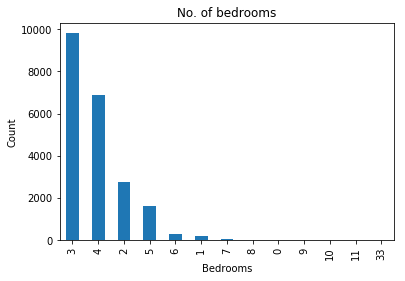

In [10]:
dataframe['bedrooms'].value_counts().plot(kind='bar')
plt.title('No. of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

Text(0.5,1,'No. of bedrooms')

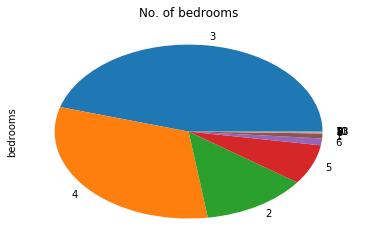

In [11]:
dataframe['bedrooms'].value_counts().plot(kind='pie')
plt.title('No. of bedrooms')

<function seaborn.utils.despine>

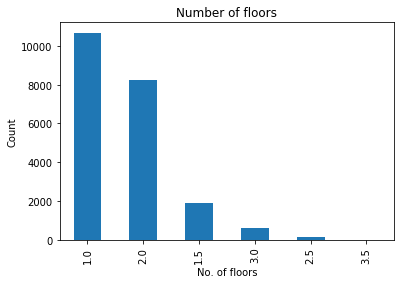

In [12]:
dataframe['floors'].value_counts().plot(kind='bar')
plt.title('Number of floors')
plt.xlabel('No. of floors')
plt.ylabel('Count')
sns.despine

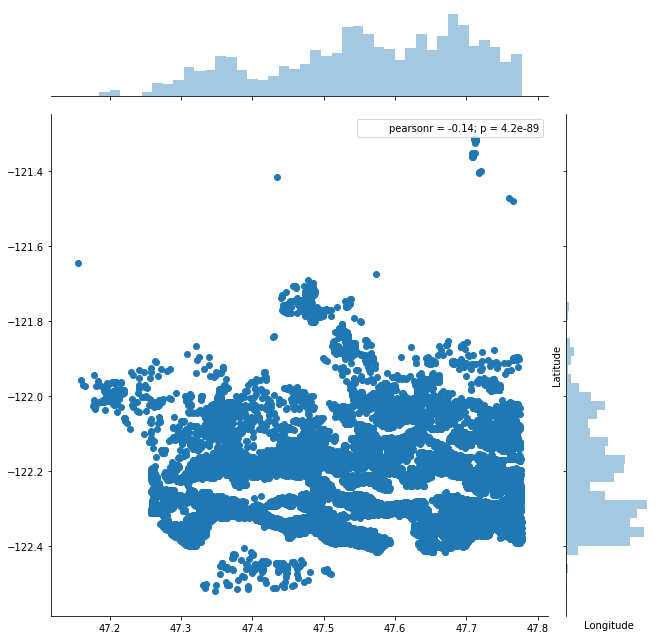

In [13]:
plt.figure(figsize=(20,20))
sns.jointplot(x=dataframe.lat.values, y=dataframe.long.values, size=9)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.show()
sns.despine()

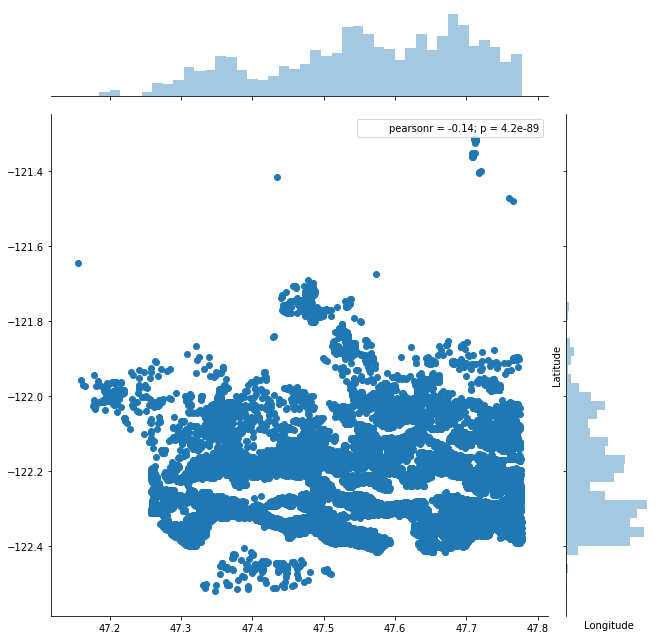

In [14]:
plt.figure(figsize=(20,20))
sns.jointplot(x=dataframe.lat.values, y=dataframe.long.values, size=9)
plt.xlabel('Longitude', fontsize=10)
plt.ylabel('Latitude', fontsize=10)
plt.show()
sns.despine()

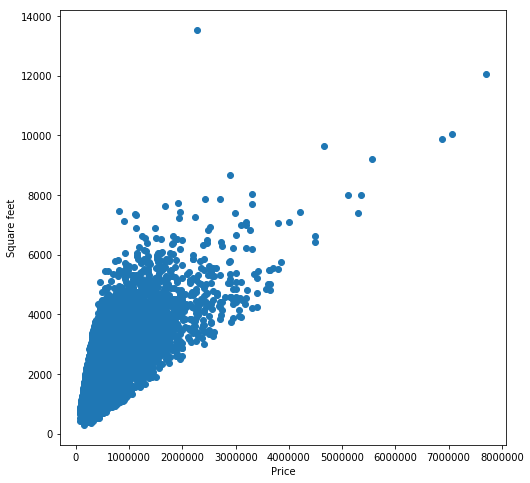

In [15]:
plt.figure(figsize=(8,8))
plt.scatter(dataframe.price, dataframe.sqft_living)
plt.xlabel('Price')
plt.ylabel('Square feet')
plt.show()

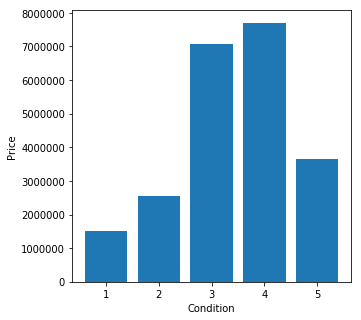

In [16]:
plt.figure(figsize=(5,5))
plt.bar(dataframe.condition, dataframe.price)
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

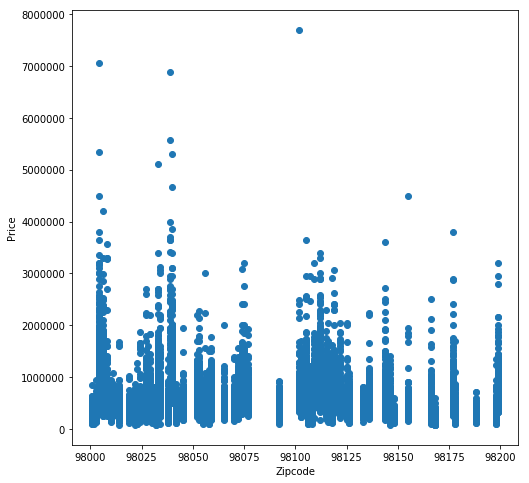

In [17]:
plt.figure(figsize=(8,8))
plt.scatter(dataframe.zipcode, dataframe.price)
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.show()

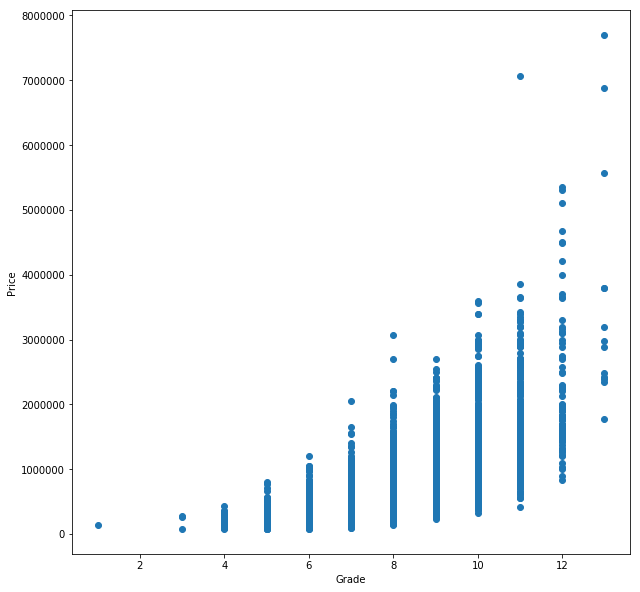

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(dataframe.grade, dataframe.price)
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

In [19]:
x_df = dataframe.drop(['id','date',], axis = 1)
x_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [20]:
y = dataframe[['price']].copy()
y_df = pd.DataFrame(y)
y_df

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
5,1225000.0
6,257500.0
7,291850.0
8,229500.0
9,323000.0


In [21]:
print('Price Vs Bedrooms: %s' % x_df['price'].corr(x_df['bedrooms']))
print('Price Vs Bathrooms: %s' % x_df['price'].corr(x_df['bathrooms']))
print('Price Vs Living Area: %s' % x_df['price'].corr(x_df['sqft_living']))
print('Price Vs Plot Area: %s' % x_df['price'].corr(x_df['sqft_lot']))
print('Price Vs No. of floors: %s' % x_df['price'].corr(x_df['floors']))
print('Price Vs Waterfront property: %s' % x_df['price'].corr(x_df['waterfront']))
print('Price Vs View: %s' % x_df['price'].corr(x_df['view']))
print('Price Vs Grade: %s' % x_df['price'].corr(x_df['grade']))
print('Price Vs Condition: %s' % x_df['price'].corr(x_df['condition']))
print('Price Vs Sqft Above: %s' % x_df['price'].corr(x_df['sqft_above']))
print('Price Vs Basement Area: %s' % x_df['price'].corr(x_df['sqft_basement']))
print('Price Vs Year Built: %s' % x_df['price'].corr(x_df['yr_built']))
print('Price Vs Year Renovated: %s' % x_df['price'].corr(x_df['yr_renovated']))
print('Price Vs Zipcode: %s' % x_df['price'].corr(x_df['zipcode']))
print('Price Vs Latitude: %s' % x_df['price'].corr(x_df['lat']))
print('Price Vs Longitude: %s' % x_df['price'].corr(x_df['long']))

Price Vs Bedrooms: 0.308349598146
Price Vs Bathrooms: 0.525137505414
Price Vs Living Area: 0.702035054612
Price Vs Plot Area: 0.0896608605871
Price Vs No. of floors: 0.256793887551
Price Vs Waterfront property: 0.266369434031
Price Vs View: 0.397293488295
Price Vs Grade: 0.66743425602
Price Vs Condition: 0.036361789129
Price Vs Sqft Above: 0.605567298356
Price Vs Basement Area: 0.323816020712
Price Vs Year Built: 0.0540115314948
Price Vs Year Renovated: 0.126433793441
Price Vs Zipcode: -0.0532028542983
Price Vs Latitude: 0.307003479995
Price Vs Longitude: 0.0216262410393


In [22]:
x_df.corr().iloc[:,-19]

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

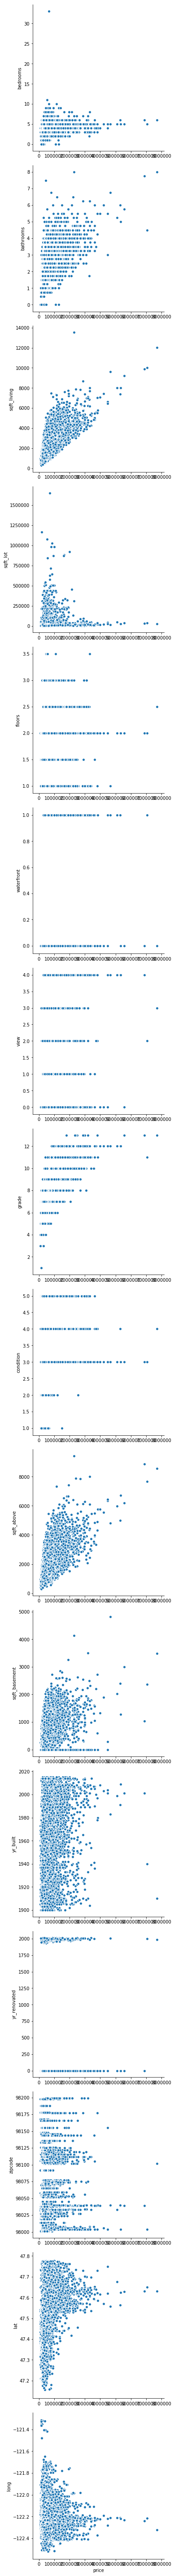

In [23]:
sns.pairplot(data=x_df,
                  x_vars=['price'],
                  y_vars=['bedrooms', 'bathrooms', 'sqft_living', 
                          'sqft_lot', 'floors', 'waterfront','view',
                          'grade','condition','sqft_above','sqft_basement',
                          'yr_built','yr_renovated','zipcode','lat','long'],
            size = 5)


In [24]:
x_df2 = x_df.drop(['price'], axis = 1)

In [25]:
reg=linear_model.LinearRegression()

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_df2,y_df,test_size=0.4,random_state=4)

In [27]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
reg.coef_

array([[ -3.51758560e+04,   4.15668761e+04,   1.09783333e+02,
          1.29887801e-01,   5.45361908e+03,   5.82967182e+05,
          5.25440940e+04,   2.73530896e+04,   9.41210868e+04,
          7.32738904e+01,   3.65094422e+01,  -2.57413912e+03,
          2.41934076e+01,  -5.41779815e+02,   6.05771594e+05,
         -2.15365692e+05,   1.99717345e+01,  -3.58271235e-01]])

In [29]:
predictions=reg.predict(x_test)
predictions

array([[ 383196.16164229],
       [ 625423.865746  ],
       [ 217225.69818279],
       ..., 
       [ 315480.46820472],
       [ 551087.68524263],
       [ 453070.91474855]])

In [30]:
reg.score(x_test,y_test)

0.70372837536686927

In [31]:
import xgboost

In [91]:
new_model = xgboost.XGBRegressor(n_estimators=750, learning_rate=0.01, gamma=0, subsample=0.55, colsample_bytree=1, max_depth=10)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
traindf, testdf = train_test_split(x_train, test_size = 0.2)
new_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=10, min_child_weight=1, missing=None, n_estimators=750,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.55)

In [94]:
from sklearn.metrics import explained_variance_score
predictions = new_model.predict(x_test)
print(explained_variance_score(predictions,y_test))

0.870755739626
